In [14]:
import pandas as pd
! pip install pandas openpyxl
!pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# File paths (update if needed)
forest_file = "Bird_Monitoring_Data_FOREST.XLSX"
grassland_file = "Bird_Monitoring_Data_GRASSLAND.XLSX"

In [3]:
import pandas as pd

forest_file = "Bird_Monitoring_Data_FOREST.XLSX"
grassland_file = "Bird_Monitoring_Data_GRASSLAND.XLSX"

forest_xls = pd.ExcelFile(forest_file)
grassland_xls = pd.ExcelFile(grassland_file)

In [4]:
print("🌲 Forest Sheets:", forest_xls.sheet_names)
print("🌾 Grassland Sheets:", grassland_xls.sheet_names)

🌲 Forest Sheets: ['ANTI', 'CATO', 'CHOH', 'GWMP', 'HAFE', 'MANA', 'MONO', 'NACE', 'PRWI', 'ROCR', 'WOTR']
🌾 Grassland Sheets: ['ANTI', 'CATO', 'CHOH', 'GWMP', 'HAFE', 'MANA', 'MONO', 'NACE', 'PRWI', 'ROCR', 'WOTR']


In [5]:
print("\n🌲 Forest Sheet Column Names:")
for sheet in forest_xls.sheet_names:
    df = forest_xls.parse(sheet)
    print(f"Sheet: {sheet} → Columns: {list(df.columns)}\n")

print("\n🌾 Grassland Sheet Column Names:")
for sheet in grassland_xls.sheet_names:
    df = grassland_xls.parse(sheet)
    print(f"Sheet: {sheet} → Columns: {list(df.columns)}\n")


🌲 Forest Sheet Column Names:
Sheet: ANTI → Columns: ['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance', 'Initial_Three_Min_Cnt']

Sheet: CATO → Columns: ['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance', 'Initial_Three_Min_Cnt']

Sheet: CHOH → Columns: ['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_

In [7]:
#Define Standard Column Mapping
# Rename grassland-specific columns to match forest
rename_map = {
    'TaxonCode': 'NPSTaxonCode',
    'Previously_Obs': None  # Optional: drop it
}
print(rename_map)

{'TaxonCode': 'NPSTaxonCode', 'Previously_Obs': None}


In [10]:
#Define Standard Column Mapping
# Forest
forest_file = "Bird_Monitoring_Data_FOREST.XLSX"
forest_sheets = {
    sheet: pd.read_excel(forest_file, sheet_name=sheet)
    .assign(Site_Code=sheet, Habitat_Type="Forest")
    for sheet in pd.ExcelFile(forest_file).sheet_names
}

# Grassland
grassland_file = "Bird_Monitoring_Data_GRASSLAND.XLSX"
grassland_sheets = {}
for sheet in pd.ExcelFile(grassland_file).sheet_names:
    df = pd.read_excel(grassland_file, sheet_name=sheet)

    # Rename columns for consistency
    df = df.rename(columns={'TaxonCode': 'NPSTaxonCode'})

    # Add 'Site_Name' column to match forest (same as sheet name)
    df['Site_Name'] = sheet

    # Drop extra column not present in forest
    df = df.drop(columns=['Previously_Obs'], errors='ignore')

    # Add standard tags
    df['Site_Code'] = sheet
    df['Habitat_Type'] = 'Grassland'

    grassland_sheets[sheet] = df
print(df)

Empty DataFrame
Columns: [Admin_Unit_Code, Sub_Unit_Code, Plot_Name, Location_Type, Year, Date, Start_Time, End_Time, Observer, Visit, Interval_Length, ID_Method, Distance, Flyover_Observed, Sex, Common_Name, Scientific_Name, AcceptedTSN, NPSTaxonCode, AOU_Code, PIF_Watchlist_Status, Regional_Stewardship_Status, Temperature, Humidity, Sky, Wind, Disturbance, Initial_Three_Min_Cnt, Site_Name, Site_Code, Habitat_Type]
Index: []

[0 rows x 31 columns]


In [12]:
df.shape

(0, 31)

In [14]:
df

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Site_Name,Site_Code,Habitat_Type


In [13]:
# Merge all sheets into one DataFrame
all_dfs = list(forest_sheets.values()) + list(grassland_sheets.values())
CombinedData = pd.concat(all_dfs, ignore_index=True)

C:\Users\susen\AppData\Local\Temp\ipykernel_16084\663350709.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  CombinedData = pd.concat(all_dfs, ignore_index=True)


In [15]:
CombinedData

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Site_Code,Habitat_Type
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,ANTI,Forest
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,ANTI,Forest
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,ANTI,Forest
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,ANTI,Forest
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,ANTI,Forest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17072,MONO,NaN,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,...,False,False,19.0,63.000000,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,MONO,Grassland
17073,MONO,NaN,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,...,False,False,19.0,63.000000,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,MONO,Grassland
17074,MONO,NaN,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,...,False,False,19.0,63.000000,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,MONO,Grassland
17075,MONO,NaN,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,...,False,False,19.0,63.000000,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,MONO,Grassland


In [16]:
# Identify empty sheets
empty_sheets = [sheet for sheet, df in {**forest_sheets, **grassland_sheets}.items() if df.empty]
num_empty_sheets = len(empty_sheets)

In [17]:
# Combine non-empty sheets
non_empty_dfs = [df for df in all_dfs if not df.empty]
CombinedData = pd.concat(non_empty_dfs, ignore_index=True)

In [18]:
# Summary stats
num_total_sheets = len(all_dfs)
num_combined_rows = CombinedData.shape[0]
num_combined_columns = CombinedData.shape[1]

(empty_sheets, num_empty_sheets, num_total_sheets, num_combined_rows, num_combined_columns)

(['CATO', 'CHOH', 'GWMP', 'NACE', 'PRWI', 'ROCR', 'WOTR'], 7, 22, 17077, 31)

In [35]:
CombinedData.to_excel("Bird_Monitoring_Forest_Grassland_Combined.xlsx", index=False)

In [19]:
# Unique species per habitat
diversity = CombinedData.groupby('Habitat_Type')['Common_Name'].nunique()
print(diversity)

Habitat_Type
Forest       108
Grassland    107
Name: Common_Name, dtype: int64


In [20]:
#Top 10 Species per Habitat
top_species = (
    CombinedData.groupby(["Habitat_Type", "Common_Name"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Habitat_Type", "Count"], ascending=[True, False])
    .groupby("Habitat_Type")
    .head(10)
)
print (top_species)

    Habitat_Type              Common_Name  Count
77        Forest           Red-eyed Vireo    694
24        Forest            Carolina Wren    646
63        Forest        Northern Cardinal    595
39        Forest  Eastern Tufted Titmouse    541
40        Forest       Eastern Wood-Pewee    486
0         Forest       Acadian Flycatcher    436
76        Forest   Red-bellied Woodpecker    398
17        Forest    Blue-gray Gnatcatcher    310
71        Forest                 Ovenbird    303
4         Forest           American Robin    294
168    Grassland        Northern Cardinal    565
150    Grassland        European Starling    516
151    Grassland            Field Sparrow    506
162    Grassland           Indigo Bunting    485
153    Grassland      Grasshopper Sparrow    382
185    Grassland     Red-winged Blackbird    379
138    Grassland         Chipping Sparrow    368
133    Grassland            Carolina Wren    365
110    Grassland       American Goldfinch    362
134    Grassland    

In [50]:
#% of PIF Watchlist species by habitat
watchlist_pct = (
    CombinedData.groupby('Habitat_Type')['PIF_Watchlist_Status']
    .mean()
    .multiply(100)
)
print(watchlist_pct)

Habitat_Type
Forest       3.955067
Grassland    0.468878
Name: PIF_Watchlist_Status, dtype: float64


In [21]:
# A4. 3-minute detection rate by habitat
three_min_detection_rate = (
    CombinedData.groupby("Habitat_Type")["Initial_Three_Min_Cnt"]
    .mean()
    .multiply(100)
)
print (three_min_detection_rate)

Habitat_Type
Forest       54.750761
Grassland    52.315086
Name: Initial_Three_Min_Cnt, dtype: float64


In [23]:
# A5. Environmental conditions (mean temp, wind, sky)
avg_temp_by_habitat = CombinedData.groupby("Habitat_Type")["Temperature"].mean()
sky_distribution = CombinedData.groupby(["Habitat_Type", "Sky"]).size().unstack(fill_value=0)
wind_distribution = CombinedData.groupby(["Habitat_Type", "Wind"]).size().unstack(fill_value=0)
print (avg_temp_by_habitat)
print(sky_distribution)
print(wind_distribution)

Habitat_Type
Forest       21.871507
Grassland    23.270519
Name: Temperature, dtype: float64
Sky           Clear or Few Clouds  Cloudy/Overcast  Fog  Mist/Drizzle  \
Habitat_Type                                                            
Forest                       2976             1877  437           267   
Grassland                    2833             1220  210           112   

Sky           Partly Cloudy  
Habitat_Type                 
Forest                 2989  
Grassland              4156  
Wind          Calm (< 1 mph) smoke rises vertically  \
Habitat_Type                                          
Forest                                         3090   
Grassland                                      1327   

Wind          Gentle breeze (8-12 mph), leaves in motion  \
Habitat_Type                                               
Forest                                               138   
Grassland                                            274   

Wind          Light air movement

In [24]:
# B1. Daily observation trends
CombinedData['Date'] = pd.to_datetime(CombinedData['Date'], errors='coerce')
CombinedData.groupby(["Date", "Habitat_Type"]).size().unstack(fill_value=0)

Habitat_Type,Forest,Grassland
Date,,
2018-05-07,124,338
2018-05-08,63,194
2018-05-10,19,568
2018-05-11,189,0
2018-05-12,201,0
...,...,...
2018-07-15,46,0
2018-07-16,0,589
2018-07-17,0,315


In [25]:
#Create Start_Hour column
CombinedData['Start_Hour'] = pd.to_datetime(CombinedData['Start_Time'], errors='coerce').dt.hour

In [26]:
hourly_distribution = CombinedData.groupby(["Start_Hour", "Habitat_Type"]).size().unstack(fill_value=0)
print(hourly_distribution)

Empty DataFrame
Columns: []
Index: []


In [27]:
CombinedData.groupby(["Start_Hour", "Habitat_Type"]).size().unstack(fill_value=0)

Habitat_Type
Start_Hour


In [28]:
#Observer effort analysis
CombinedData.groupby(["Habitat_Type", "Observer"]).size().reset_index(name="Observations")

,Habitat_Type,Observer,Observations
0,Forest,Brian Swimelar,2351
1,Forest,Elizabeth Oswald,3285
2,Forest,Kimberly Serno,2910
3,Grassland,Brian Swimelar,2433
4,Grassland,Elizabeth Oswald,3106
5,Grassland,Kimberly Serno,2992


In [30]:
#Seasonal/monthly patterns
CombinedData['Month'] = CombinedData['Date'].dt.month
CombinedData.groupby(["Month", "Habitat_Type"]).size().unstack(fill_value=0)

Habitat_Type,Forest,Grassland
Month,,
5,2390,3206
6,4013,2583
7,2143,2742


<Axes: title={'center': 'Observation Trends by Habitat'}, xlabel='Date'>

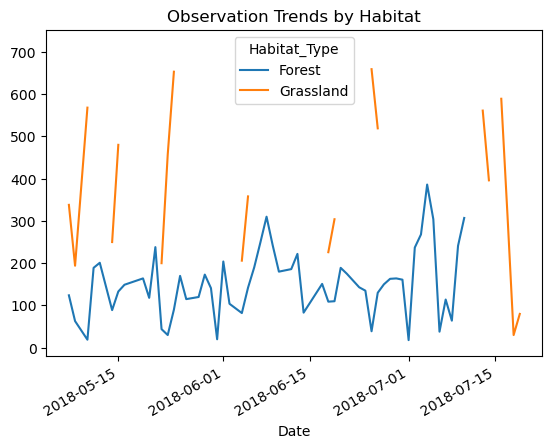

In [31]:
#Observation Trends Over Time
CombinedData['Date'] = pd.to_datetime(CombinedData['Date'], errors='coerce')
daily_counts = CombinedData.groupby(['Date', 'Habitat_Type']).size().unstack()
daily_counts.plot(title='Observation Trends by Habitat')

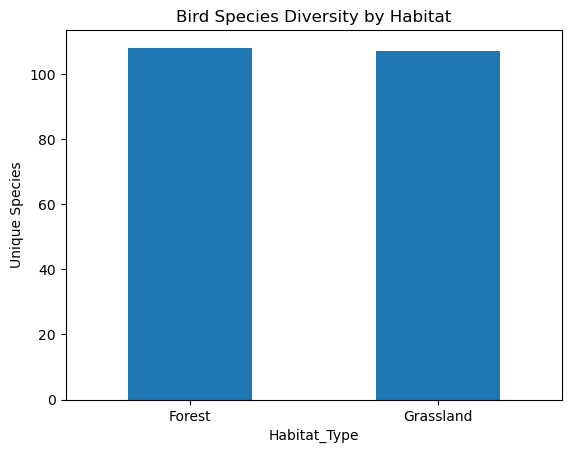

In [32]:
#1. Species Diversity by Habitat
# Bar chart: Forest vs. Grassland → Number of unique species
import matplotlib.pyplot as plt

diversity = CombinedData.groupby("Habitat_Type")["Common_Name"].nunique()
diversity.plot(kind="bar", title="Bird Species Diversity by Habitat", ylabel="Unique Species")
plt.xticks(rotation=0)
plt.show()

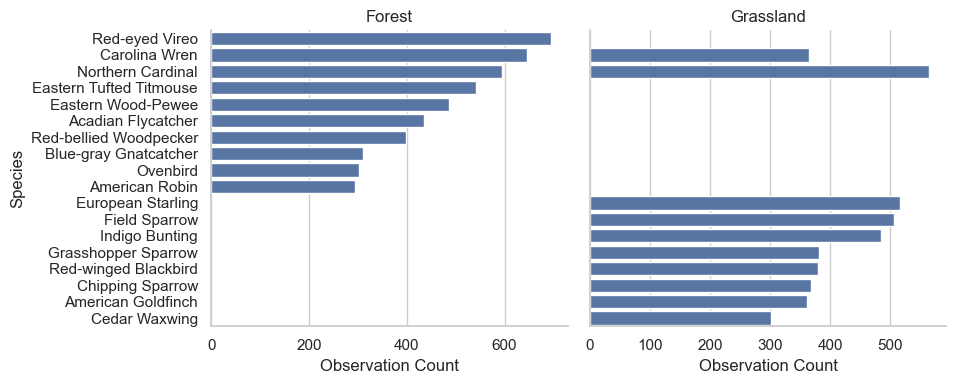

In [33]:
# 2. Top 10 Species per Habitat
# Horizontal bar chart for each habitat
top_species = (
    CombinedData.groupby(["Habitat_Type", "Common_Name"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Habitat_Type", "Count"], ascending=[True, False])
    .groupby("Habitat_Type")
    .head(10)
)

import seaborn as sns

sns.set(style="whitegrid")
g = sns.catplot(
    data=top_species,
    kind="bar",
    x="Count",
    y="Common_Name",
    col="Habitat_Type",
    sharex=False,
    height=4,
    aspect=1.2
)
g.set_titles("{col_name}")
g.set_axis_labels("Observation Count", "Species")
plt.tight_layout()
plt.show()

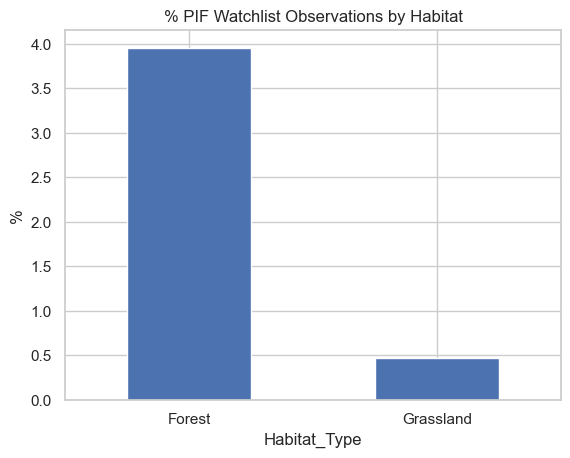

In [34]:
#3. PIF Watchlist % by Habitat
# Pie or bar chart

watchlist_pct = CombinedData.groupby("Habitat_Type")["PIF_Watchlist_Status"].mean() * 100
watchlist_pct.plot(kind='bar', title="% PIF Watchlist Observations by Habitat", ylabel="%")
plt.xticks(rotation=0)
plt.show()

In [61]:
print(hourly.dtypes)
print(hourly.head())

Series([], dtype: object)
Empty DataFrame
Columns: []
Index: []


In [64]:
print(hourly_counts.info())
print(hourly_counts.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame
None
Empty DataFrame
Columns: []
Index: []


In [65]:
print(CombinedData['Start_Time'].dropna().unique()[:10])

[datetime.time(6, 19) datetime.time(6, 2) datetime.time(7, 21)
 datetime.time(8, 28) datetime.time(9, 26) datetime.time(10, 1)
 datetime.time(7, 9) datetime.time(8, 34) datetime.time(7, 22)
 datetime.time(9, 53)]


In [66]:
CombinedData['Start_Hour'] = pd.to_datetime(CombinedData['Start_Time'], errors='coerce').dt.hour
print(CombinedData['Start_Hour'].dropna().unique())

[]


In [67]:
print(CombinedData['Habitat_Type'].unique())
print(CombinedData['Habitat_Type'].isna().sum())

['Forest' 'Grassland']
0


In [68]:
df = CombinedData.dropna(subset=['Start_Hour', 'Habitat_Type'])
print(df.shape)

(0, 33)


In [70]:
CombinedData

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Site_Code,Habitat_Type,Start_Hour,Month
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,ANTI,Forest,NaN,5
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,ANTI,Forest,NaN,5
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,ANTI,Forest,NaN,5
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,ANTI,Forest,NaN,5
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,ANTI,Forest,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17072,MONO,NaN,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,...,19.0,63.000000,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,MONO,Grassland,NaN,5
17073,MONO,NaN,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,...,19.0,63.000000,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,MONO,Grassland,NaN,5
17074,MONO,NaN,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,...,19.0,63.000000,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,MONO,Grassland,NaN,5
17075,MONO,NaN,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,...,19.0,63.000000,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,MONO,Grassland,NaN,5


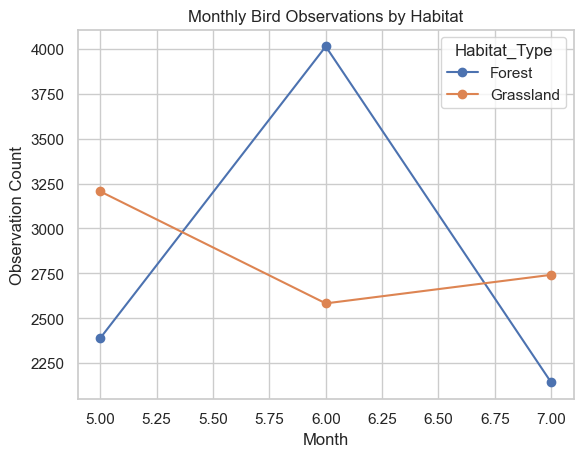

In [72]:
#5. Monthly Observation Trends
# Line or area chart

CombinedData['Month'] = CombinedData['Date'].dt.month
monthly = CombinedData.groupby(["Month", "Habitat_Type"]).size().unstack()
monthly.plot(kind='line', marker='o', title="Monthly Bird Observations by Habitat")
plt.xlabel("Month")
plt.ylabel("Observation Count")
plt.grid(True)
plt.show()

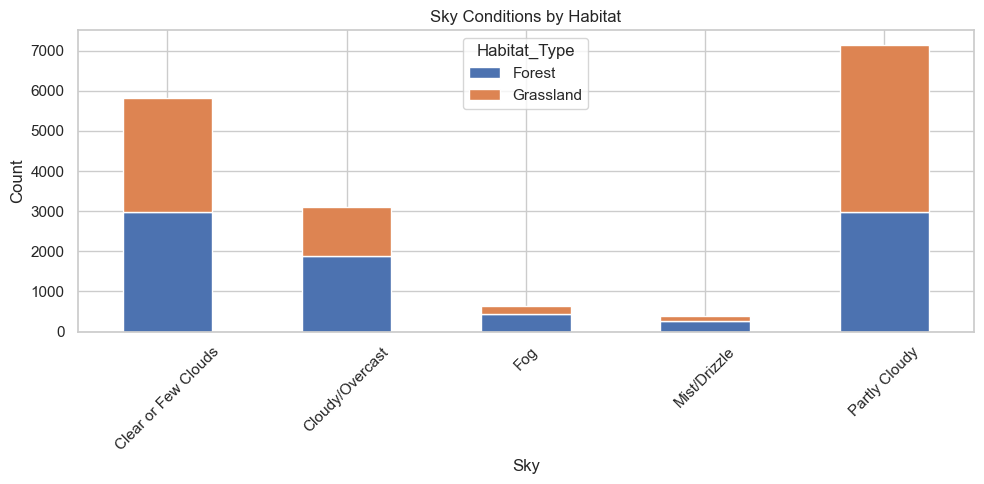

In [73]:
#6. Sky or Wind Condition Distribution
# Stacked bar chart

sky_dist = CombinedData.groupby(["Habitat_Type", "Sky"]).size().unstack().fillna(0)
sky_dist.T.plot(kind="bar", stacked=True, title="Sky Conditions by Habitat", figsize=(10,5))
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
CombinedData.to_excel("Bird_Monitoring_Combined.xlsx", index=False)

In [75]:
# export as CSV
CombinedData.to_csv("Bird_Monitoring_Combined.csv", index=False)

In [35]:
print(CombinedData['Start_Time'].head(10))
print(CombinedData['Start_Time'].dtype)

0    06:19:00
1    06:19:00
2    06:19:00
3    06:19:00
4    06:19:00
5    06:19:00
6    06:19:00
7    06:19:00
8    06:19:00
9    06:19:00
Name: Start_Time, dtype: object
object


In [36]:
# Step 2: Convert Start_Time to datetime and extract hour
CombinedData['Parsed_Start_Time'] = pd.to_datetime(CombinedData['Start_Time'], format='%H:%M:%S', errors='coerce')
CombinedData['Start_Hour'] = CombinedData['Parsed_Start_Time'].dt.hour

# Check if it worked
print(CombinedData[['Start_Time', 'Parsed_Start_Time', 'Start_Hour']].head(10))

  Start_Time   Parsed_Start_Time  Start_Hour
0   06:19:00 1900-01-01 06:19:00           6
1   06:19:00 1900-01-01 06:19:00           6
2   06:19:00 1900-01-01 06:19:00           6
3   06:19:00 1900-01-01 06:19:00           6
4   06:19:00 1900-01-01 06:19:00           6
5   06:19:00 1900-01-01 06:19:00           6
6   06:19:00 1900-01-01 06:19:00           6
7   06:19:00 1900-01-01 06:19:00           6
8   06:19:00 1900-01-01 06:19:00           6
9   06:19:00 1900-01-01 06:19:00           6


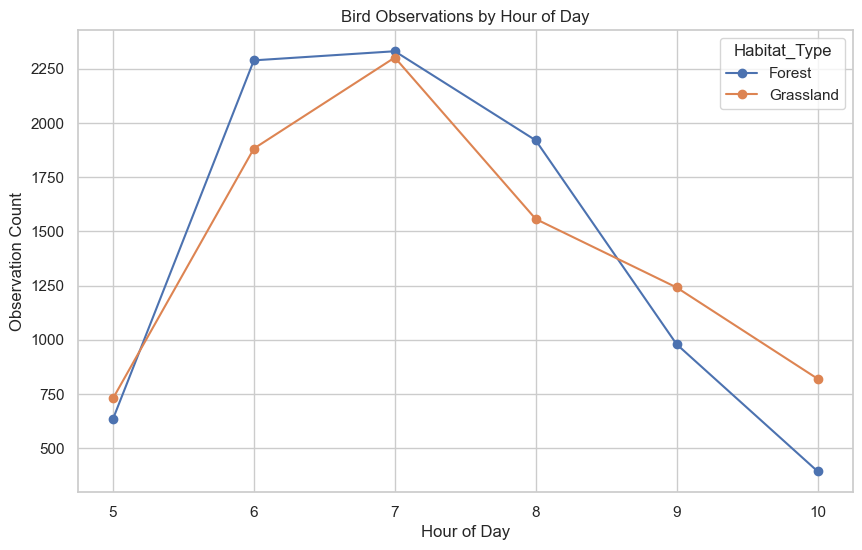

In [38]:
#Create the Hourly Activity Plot

import matplotlib.pyplot as plt

# Step 1: Group and count by hour and habitat
hourly_counts = CombinedData.groupby(['Start_Hour', 'Habitat_Type']).size().unstack(fill_value=0)

# Step 2: Sort by hour (optional but better visuals)
hourly_counts = hourly_counts.sort_index()

# Step 3: Plot the data
hourly_counts.plot(kind='line', marker='o', figsize=(10, 6), title="Bird Observations by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Observation Count")
plt.grid(True)
plt.show()

C:\Users\susen\AppData\Local\Temp\ipykernel_16084\2903248884.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_forest, y="Common_Name", x="Count", ax=axes[0], palette="Greens_d")
C:\Users\susen\AppData\Local\Temp\ipykernel_16084\2903248884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_grass, y="Common_Name", x="Count", ax=axes[1], palette="YlOrBr")


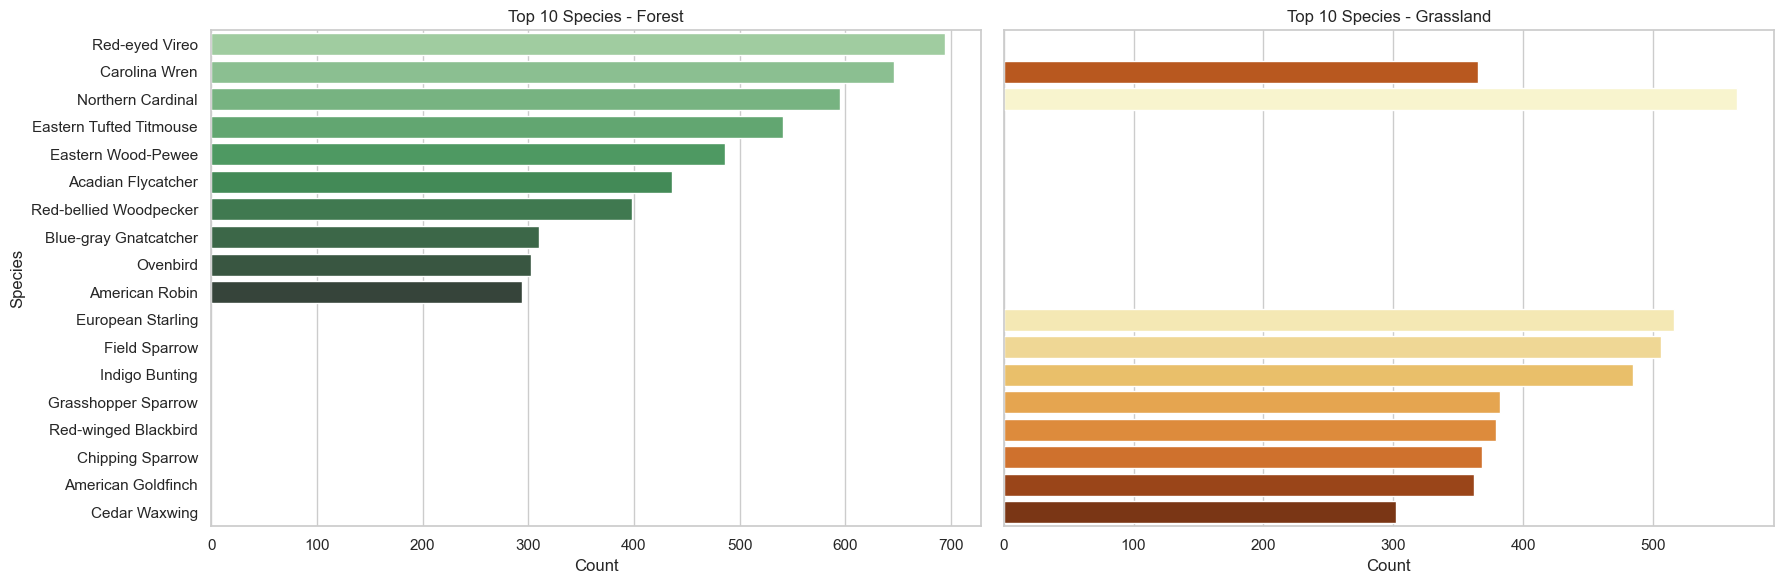

In [39]:
#Top 10 Species per Habitat (Forest vs. Grassland)

import matplotlib.pyplot as plt
import seaborn as sns

# Group and sort
top_species = (
    CombinedData.groupby(["Habitat_Type", "Common_Name"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Habitat_Type", "Count"], ascending=[True, False])
)

# Top 10 for each
top10_forest = top_species[top_species["Habitat_Type"] == "Forest"].head(10)
top10_grass = top_species[top_species["Habitat_Type"] == "Grassland"].head(10)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
sns.barplot(data=top10_forest, y="Common_Name", x="Count", ax=axes[0], palette="Greens_d")
axes[0].set_title("Top 10 Species - Forest")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Species")

sns.barplot(data=top10_grass, y="Common_Name", x="Count", ax=axes[1], palette="YlOrBr")
axes[1].set_title("Top 10 Species - Grassland")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

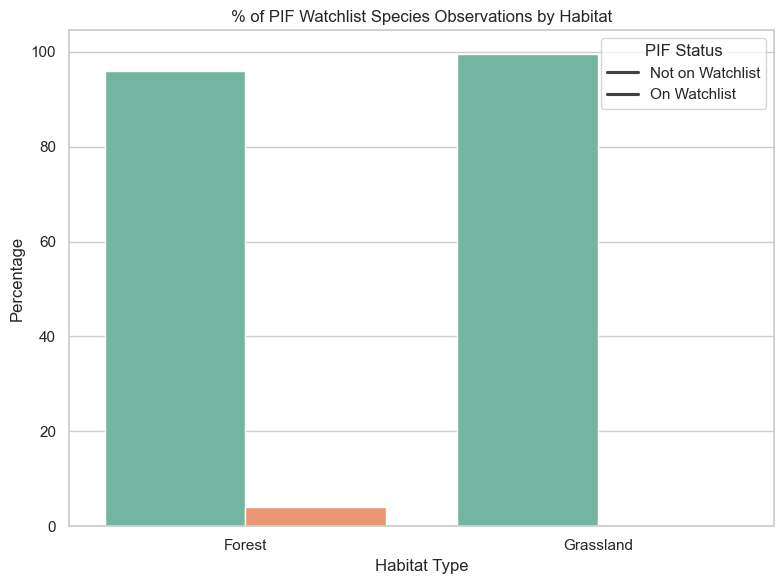

In [40]:
# Calculate percentage of PIF Watchlist species by habitat
pif_counts = (
    CombinedData.groupby("Habitat_Type")["PIF_Watchlist_Status"]
    .value_counts(normalize=True)
    .unstack()
    * 100
).reset_index()

# Rename columns for clarity
pif_counts.columns.name = None
pif_counts.columns = ["Habitat_Type", "Not_Watchlist", "Watchlist"]

# Melt for plotting
pif_melted = pif_counts.melt(id_vars="Habitat_Type", value_vars=["Not_Watchlist", "Watchlist"],
                             var_name="PIF_Status", value_name="Percentage")

# Plot as stacked bar
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(data=pif_melted, x="Habitat_Type", y="Percentage", hue="PIF_Status", palette="Set2")
plt.title("% of PIF Watchlist Species Observations by Habitat")
plt.ylabel("Percentage")
plt.xlabel("Habitat Type")
plt.legend(title="PIF Status", labels=["Not on Watchlist", "On Watchlist"])
plt.tight_layout()
plt.show()

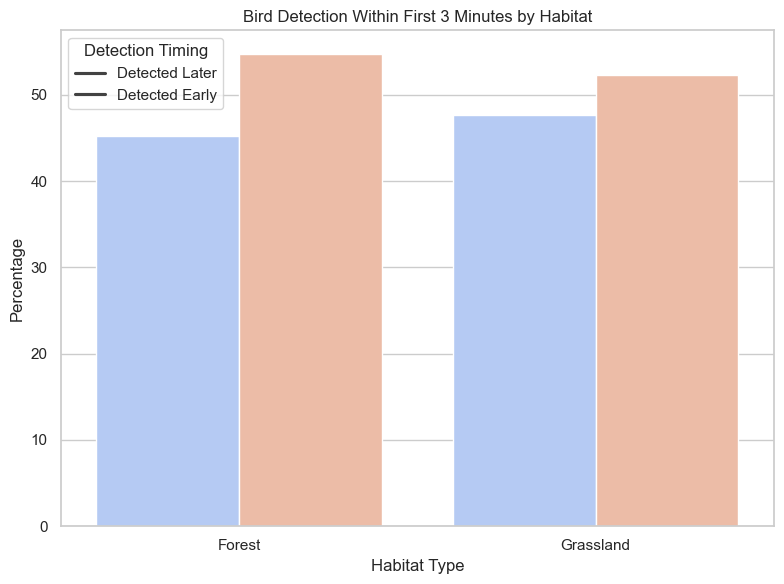

In [41]:
# Group by habitat and detection timing
three_min_counts = (
    CombinedData.groupby("Habitat_Type")["Initial_Three_Min_Cnt"]
    .value_counts(normalize=True)
    .unstack()
    * 100
).reset_index()

# Rename for clarity
three_min_counts.columns = ["Habitat_Type", "Detected_Later", "Detected_Early"]

# Melt for plotting
three_min_melted = three_min_counts.melt(id_vars="Habitat_Type", value_vars=["Detected_Later", "Detected_Early"],
                                         var_name="Detection_Timing", value_name="Percentage")

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(data=three_min_melted, x="Habitat_Type", y="Percentage", hue="Detection_Timing", palette="coolwarm")
plt.title("Bird Detection Within First 3 Minutes by Habitat")
plt.ylabel("Percentage")
plt.xlabel("Habitat Type")
plt.legend(title="Detection Timing", labels=["Detected Later", "Detected Early"])
plt.tight_layout()
plt.show()

C:\Users\susen\AppData\Local\Temp\ipykernel_16084\499249979.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=CombinedData, x="Habitat_Type", y="Temperature", palette="YlOrRd")


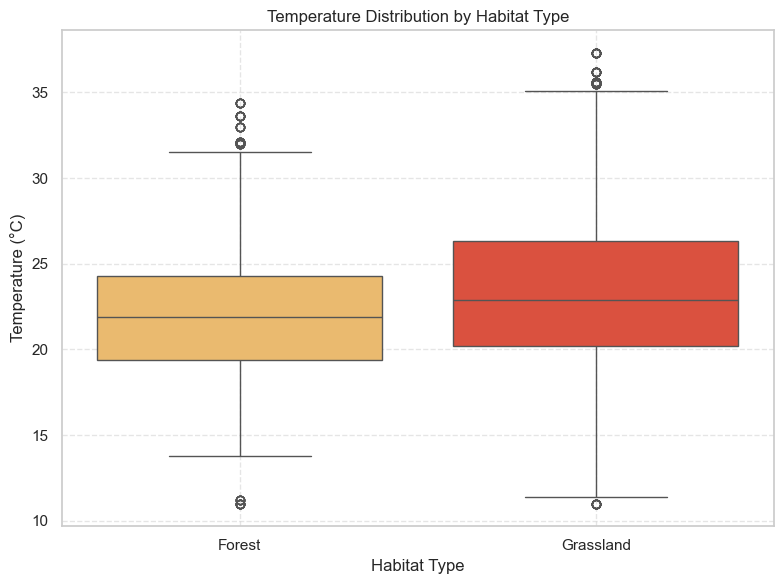

In [46]:
# Temperature

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=CombinedData, x="Habitat_Type", y="Temperature", palette="YlOrRd")
plt.title("Temperature Distribution by Habitat Type")
plt.xlabel("Habitat Type")
plt.ylabel("Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
#plt.show()

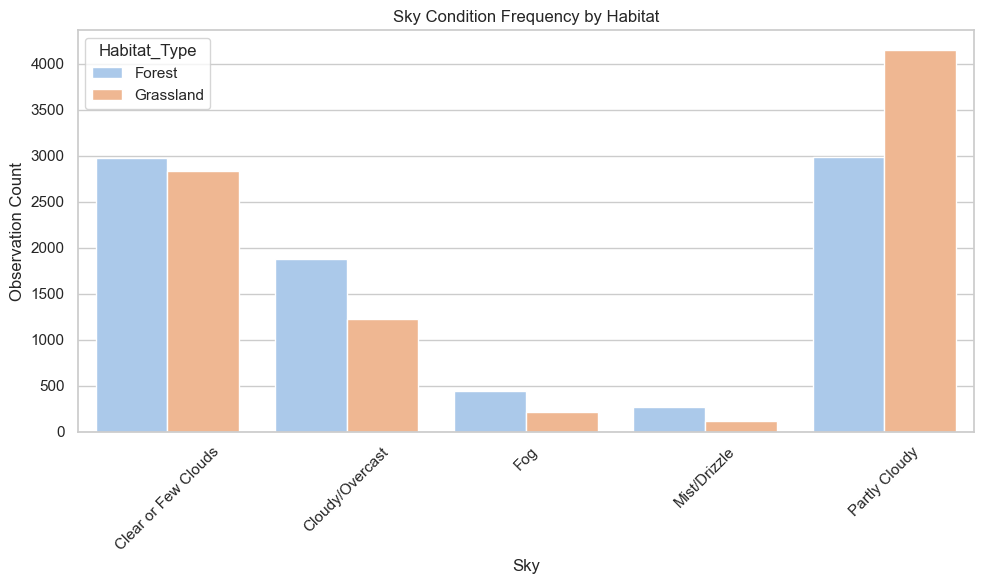

In [43]:
# Sky

sky_dist = CombinedData.groupby(["Habitat_Type", "Sky"]).size().reset_index(name="Count")

plt.figure(figsize=(10, 6))
sns.barplot(data=sky_dist, x="Sky", y="Count", hue="Habitat_Type", palette="pastel")
plt.title("Sky Condition Frequency by Habitat")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

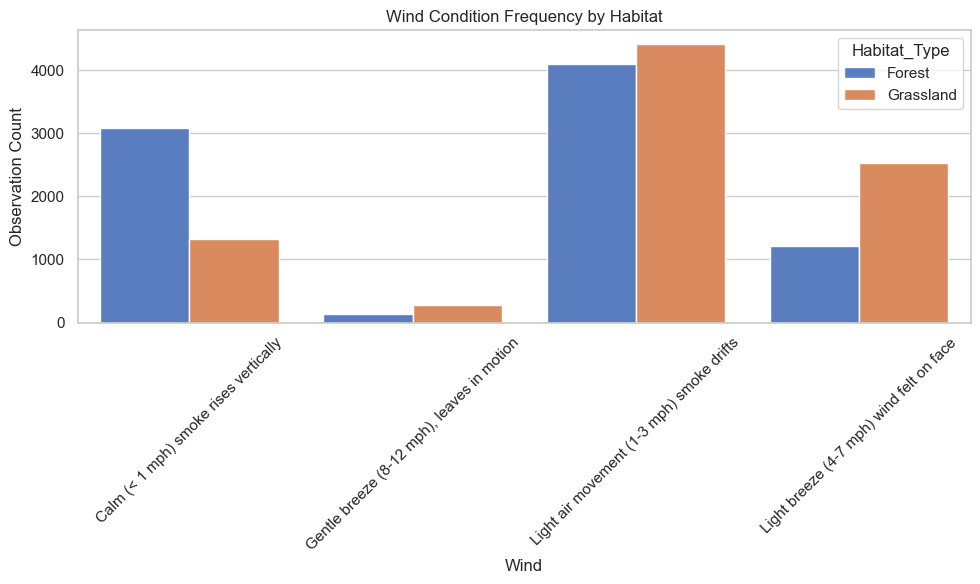

In [45]:
# wind

wind_dist = CombinedData.groupby(["Habitat_Type", "Wind"]).size().reset_index(name="Count")

plt.figure(figsize=(10, 6))
sns.barplot(data=wind_dist, x="Wind", y="Count", hue="Habitat_Type", palette="muted")
plt.title("Wind Condition Frequency by Habitat")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\susen\AppData\Local\Temp\ipykernel_16084\1833680557.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="viridis")


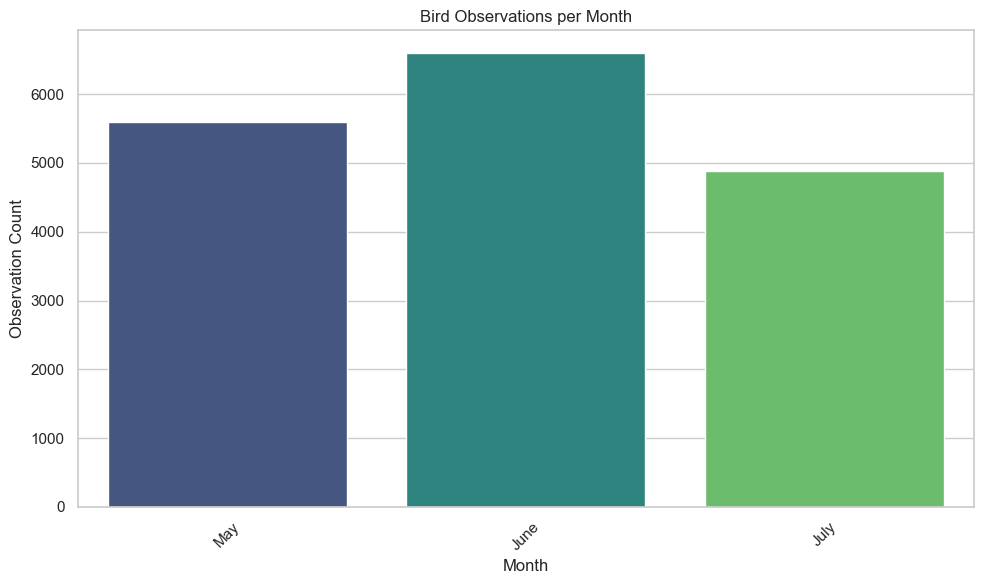

In [47]:
#Daily / Monthly Observation Trends
#A. Monthly Trends (Bar Plot)
# Extract month from date
CombinedData["Month"] = CombinedData["Date"].dt.month_name()

# Order months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Count observations per month
monthly_counts = CombinedData["Month"].value_counts().reindex(month_order).dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Bird Observations per Month")
plt.xlabel("Month")
plt.ylabel("Observation Count")
plt.tight_layout()
plt.show()

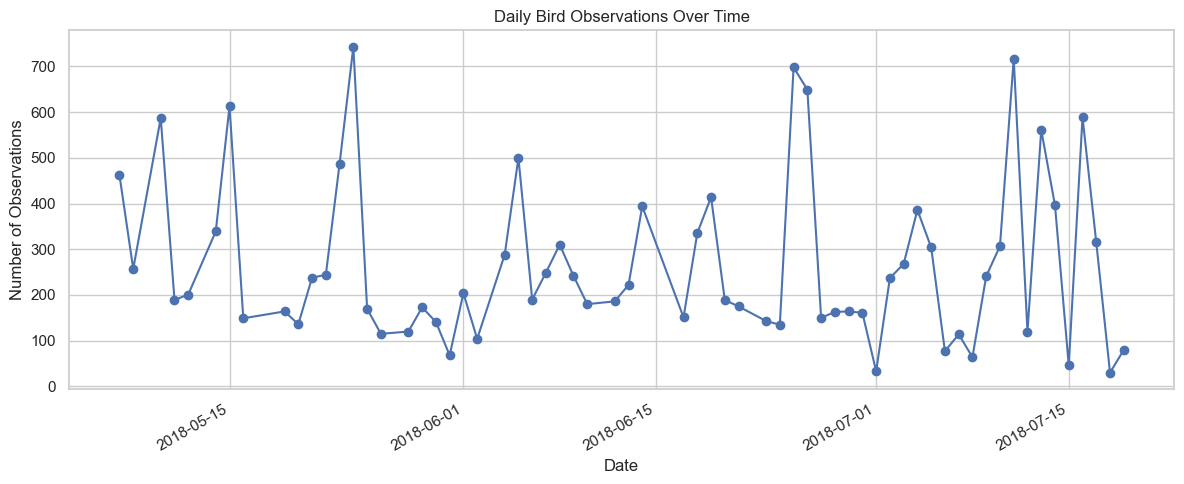

In [48]:
#Observation Counts by Date (Time Series)
daily_counts = CombinedData["Date"].value_counts().sort_index()

plt.figure(figsize=(12, 5))
daily_counts.plot(kind="line", marker='o')
plt.title("Daily Bird Observations Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Observations")
plt.grid(True)
plt.tight_layout()
plt.show()

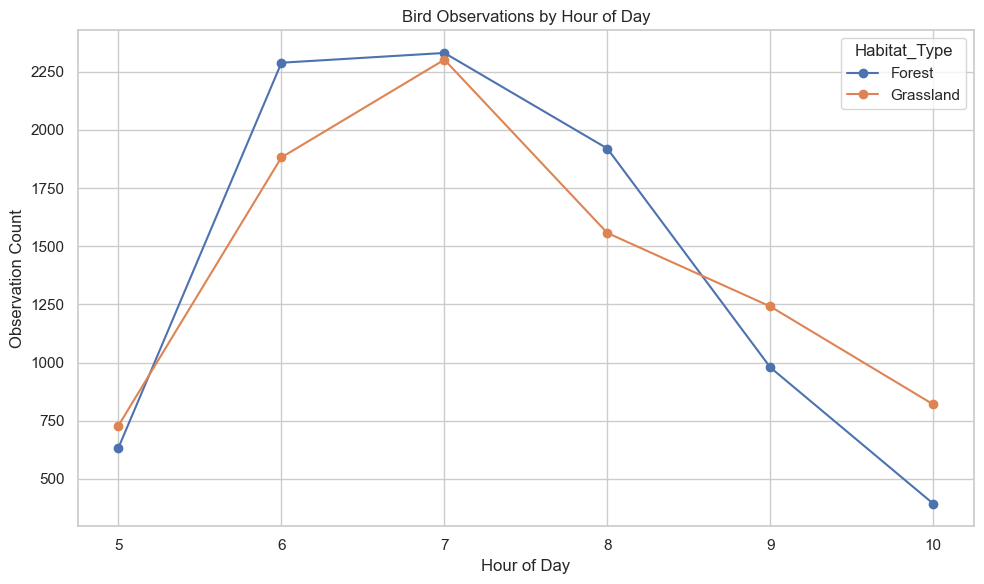

In [49]:
#Time of Day Analysis
hourly_counts = CombinedData.groupby(["Start_Hour", "Habitat_Type"]).size().unstack(fill_value=0)

hourly_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Bird Observations by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Observation Count")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\susen\AppData\Local\Temp\ipykernel_16084\3793581808.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=observer_counts.values, y=observer_counts.index, palette="Blues_d")


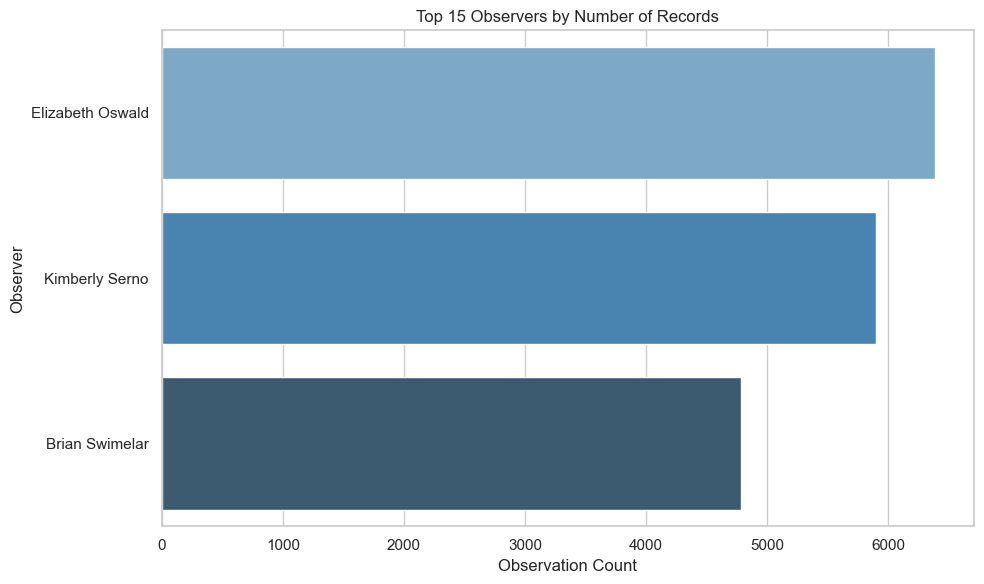

In [50]:
#Observer Effort Analysis
observer_counts = CombinedData["Observer"].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=observer_counts.values, y=observer_counts.index, palette="Blues_d")
plt.title("Top 15 Observers by Number of Records")
plt.xlabel("Observation Count")
plt.ylabel("Observer")
plt.tight_layout()
plt.show()

In [51]:
#Seasonal Patterns from Observation Dates
#Define Month → Season Mapping
def get_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:
        return "Winter"

# Apply season mapping
CombinedData["Month_Num"] = CombinedData["Date"].dt.month
CombinedData["Season"] = CombinedData["Month_Num"].apply(get_season)

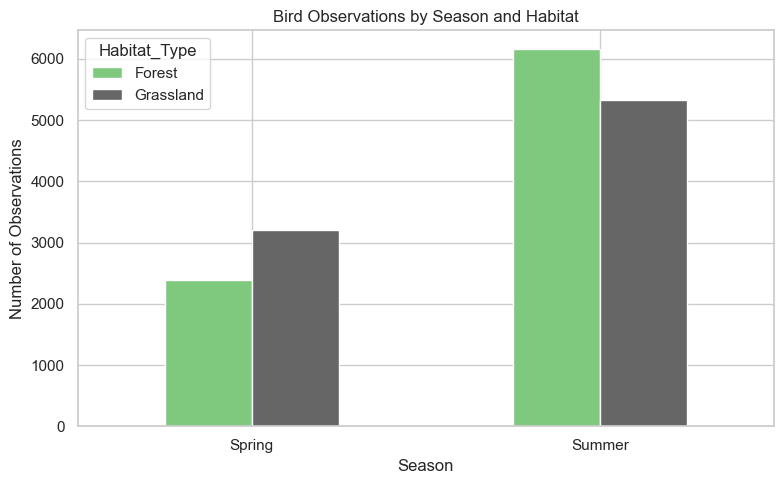

In [52]:
#Observation Count by Season & Habitat
season_counts = CombinedData.groupby(["Season", "Habitat_Type"]).size().unstack()

# Plot
season_counts.plot(kind='bar', figsize=(8, 5), colormap="Accent")
plt.title("Bird Observations by Season and Habitat")
plt.xlabel("Season")
plt.ylabel("Number of Observations")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

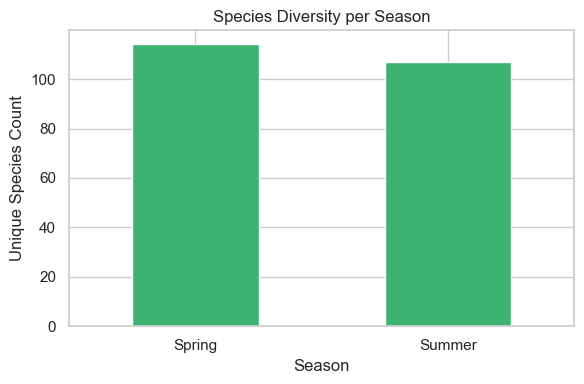

In [53]:
#Species Diversity by Season
species_by_season = CombinedData.groupby("Season")["Scientific_Name"].nunique()

# Plot
species_by_season.plot(kind='bar', color='mediumseagreen', figsize=(6, 4))
plt.title("Species Diversity per Season")
plt.xlabel("Season")
plt.ylabel("Unique Species Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [55]:
# 1. Final combined cleaned dataset
combined_data = CombinedData

# 2. Species count per habitat
species_counts = CombinedData.groupby("Habitat_Type")["Scientific_Name"].nunique().reset_index(name="Unique_Species")

# 3. Top 10 species per habitat
top_species_forest = (
    CombinedData[CombinedData["Habitat_Type"] == "Forest"]["Common_Name"]
    .value_counts().head(10).reset_index()
)
top_species_forest.columns = ["Common_Name", "Count"]

top_species_grassland = (
    CombinedData[CombinedData["Habitat_Type"] == "Grassland"]["Common_Name"]
    .value_counts().head(10).reset_index()
)
top_species_grassland.columns = ["Common_Name", "Count"]

# 4. PIF Watchlist percentage by habitat
pif_percent = (
    CombinedData.groupby("Habitat_Type")["PIF_Watchlist_Status"]
    .mean().reset_index(name="Watchlist_%")
)

# 5. Initial detection (first 3 minutes)
three_min_summary = (
    CombinedData.groupby("Habitat_Type")["Initial_Three_Min_Cnt"]
    .value_counts(normalize=True).unstack() * 100
).round(1)

# 6. Environmental summary by habitat
env_summary = CombinedData.groupby("Habitat_Type")[["Temperature", "Humidity"]].mean().round(1)

# 7. Season-wise activity
season_counts = CombinedData.groupby(["Season", "Habitat_Type"]).size().unstack(fill_value=0)

In [56]:
from pandas import ExcelWriter

# Create the Excel file
with ExcelWriter("Bird_Observation_Analysis.xlsx", engine="xlsxwriter") as writer:
    combined_data.to_excel(writer, sheet_name="Full_Data", index=False)
    species_counts.to_excel(writer, sheet_name="Species_Count", index=False)
    top_species_forest.to_excel(writer, sheet_name="Top10_Forest", index=False)
    top_species_grassland.to_excel(writer, sheet_name="Top10_Grassland", index=False)
    pif_percent.to_excel(writer, sheet_name="PIF_Watchlist%", index=False)
    three_min_summary.to_excel(writer, sheet_name="3_Minute_Detection")
    env_summary.to_excel(writer, sheet_name="Environmental_Means")
    season_counts.to_excel(writer, sheet_name="Seasonal_Activity")

print("✅ Export complete! File saved as: Bird_Observation_Analysis.xlsx")

✅ Export complete! File saved as: Bird_Observation_Analysis.xlsx
